In [1]:
import numpy as np
from keras.datasets import imdb  
from matplotlib import pyplot  
from keras.preprocessing import sequence  

C:\Users\pangbochen\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(X_train,y_train),(X_test,y_test)=imdb.load_data() 

In [3]:
X_train.shape

(25000,)

In [4]:
y_train.shape

(25000,)

In [5]:
X_test.shape

(25000,)

In [6]:
y_train[0]

1

In [7]:
y_train[1]

0

In [8]:
from collections import Counter

In [9]:
cnt = Counter(y_train)

In [10]:
cnt

Counter({0: 12500, 1: 12500})

In [11]:
len(X_train[5])

43

In [12]:
cnt_len = Counter([len(node) for node in X_train])

In [13]:
np.unique(y_train)

array([0, 1], dtype=int64)

In [15]:
len(np.unique(np.hstack(X_train))) # stack arrays in sequence horizontally (column wise)

88585

In [16]:
result = list(map(len, X_train))

In [17]:
# sequence.pad_sequences
# maxlen as 500, pre pad 0
X_train = sequence.pad_sequences(X_train, maxlen=500)

In [18]:
print(len(X_train[0]))

500


In [19]:
np.mean(result)

238.71364

In [21]:
np.std(result)

176.49367364852034

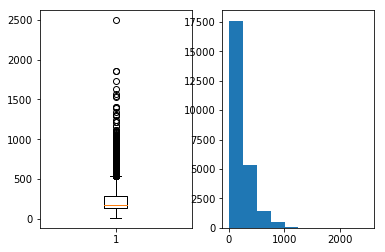

In [22]:
pyplot.subplot(121)  
pyplot.boxplot(result)  
pyplot.subplot(122)  
pyplot.hist(result)  
pyplot.show()  

## Normal Nerual Network

In [23]:
import numpy as np
from keras.datasets import imdb  
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import Flatten  
from keras.layers.embeddings import Embedding  
from keras.preprocessing import sequence  

In [25]:
seed=7  
np.random.seed(seed)  
top_words=5000  
test_split=0.33  
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=top_words)  

In [26]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

model

In [28]:
model=Sequential()  
model.add(Embedding(top_words,32,input_length=max_words))  
model.add(Flatten())  
model.add(Dense(250,activation='relu'))  
model.add(Dense(1))  
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 25s 981us/step - loss: 0.6220 - acc: 0.6887 - val_loss: 0.4238 - val_acc: 0.8250
Epoch 2/20
25000/25000 [==============================] - 28s 1ms/step - loss: 0.3284 - acc: 0.8216 - val_loss: 0.4898 - val_acc: 0.8091
Epoch 3/20
25000/25000 [==============================] - 28s 1ms/step - loss: 0.4289 - acc: 0.7344 - val_loss: 0.8653 - val_acc: 0.6444
Epoch 4/20
25000/25000 [==============================] - 28s 1ms/step - loss: 0.2077 - acc: 0.5570 - val_loss: 0.8995 - val_acc: 0.5039
Epoch 5/20
25000/25000 [==============================] - 28s 1ms/step - loss: 0.1393 - acc: 0.4216 - val_loss: 0.9842 - val_acc: 0.4542
Epoch 6/20
25000/25000 [==============================] - 28s 1ms/step - loss: 0.1183 - acc: 0.3539 - val_loss: 3.2313 - val_acc: 0.2592
Epoch 7/20
25000/25000 [==============================] - 27s 1ms/step - loss: 0.7733 - acc: 0.4350 - val_loss: 1.0374 - val_a

In [31]:
scores=model.evaluate(X_test, y_test, verbose=0)
scores[1]*100

12.776000000000002

## CNN


In [32]:
# CNN for the IMDB problem  
import numpy  
from keras.datasets import imdb  
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import Flatten  
from keras.layers.convolutional import Convolution1D  
from keras.layers.convolutional import MaxPooling1D  
from keras.layers.embeddings import Embedding  
from keras.preprocessing import sequence  
  
seed = 7  
numpy.random.seed(seed)  
# load the dataset but only keep the top n words, zero the rest  
top_words = 5000  
test_split = 0.33  
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)  
# pad dataset to a maximum review length in words  
max_words = 500  
X_train = sequence.pad_sequences(X_train, maxlen=max_words)  
X_test = sequence.pad_sequences(X_test, maxlen=max_words)  
model = Sequential()  
model.add(Embedding(top_words, 32, input_length=max_words))  
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))  
model.add(MaxPooling1D(pool_length=2))  
model.add(Flatten())  
model.add(Dense(250, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))  
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  
print(model.summary())  
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)  
scores = model.evaluate(X_test, y_test, verbose=0)  
print("Accuracy: %.2f%%" % (scores[1]*100))

C:\Users\pangbochen\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
C:\Users\pangbochen\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
C:\Users\pangbochen\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
_________________________________________________________________
